In [1]:
# Importing Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from PIL import Image
from IPython.display import Image
from wordcloud import WordCloud, STOPWORDS

In [2]:
#Load data set

df = pd.read_csv("C:\\Users\\Silent Monster\\Documents\\Data Analyst Project\\Software Professional Salaries - Starter Notebook\\Software_Professional_Salaries.csv")
df.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android


In [3]:
# Shape dataset

df.shape

(22770, 8)

In [4]:
# Columns Present in the dataset

df.columns

Index(['Rating', 'Company Name', 'Job Title', 'Salary', 'Salaries Reported',
       'Location', 'Employment Status', 'Job Roles'],
      dtype='object')

In [5]:
# Cheking information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22770 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB


In [6]:
df.describe()

,Rating,Salary,Salaries Reported
count,22770.000000,2.277000e+04,22770.000000
mean,3.918213,6.953872e+05,1.855775
std,0.519675,8.843990e+05,6.823668
min,1.000000,2.112000e+03,1.000000
25%,3.700000,3.000000e+05,1.000000
50%,3.900000,5.000000e+05,1.000000
75%,4.200000,9.000000e+05,1.000000
max,5.000000,9.000000e+07,361.000000


In [7]:
# Cheking dataset if any null value

df.isna().sum()

Rating               0
Company Name         0
Job Title            0
Salary               0
Salaries Reported    0
Location             0
Employment Status    0
Job Roles            0
dtype: int64

In [8]:
# Cheking dataset if any duplicate value

df.duplicated().sum()

0

In [9]:
# Cheking dataset number of unique (Rating)

df['Rating'].nunique()

41

In [10]:
# Cheking dataset number of unique (Company Name)


df['Company Name'].nunique()

11261

In [11]:
# Cheking dataset number of unique (Job Title)

df['Job Title'].nunique()

1080

In [12]:
# Cheking dataset number of unique (Salaries Reported)

df['Salaries Reported'].nunique()

82

In [13]:
# Cheking diferent location 

df['Location'].unique()

array(['Bangalore', 'Chennai', 'Hyderabad', 'New Delhi', 'Pune', 'Jaipur',
       'Kerala', 'Kolkata', 'Madhya Pradesh', 'Mumbai'], dtype=object)

In [14]:
# cheking total Location

df['Location'].value_counts()

Bangalore         8264
Hyderabad         4467
New Delhi         4176
Chennai           2458
Pune              2134
Mumbai             749
Kolkata            178
Madhya Pradesh     155
Kerala             108
Jaipur              81
Name: Location, dtype: int64

<AxesSubplot:xlabel='Location', ylabel='Salaries Reported'>

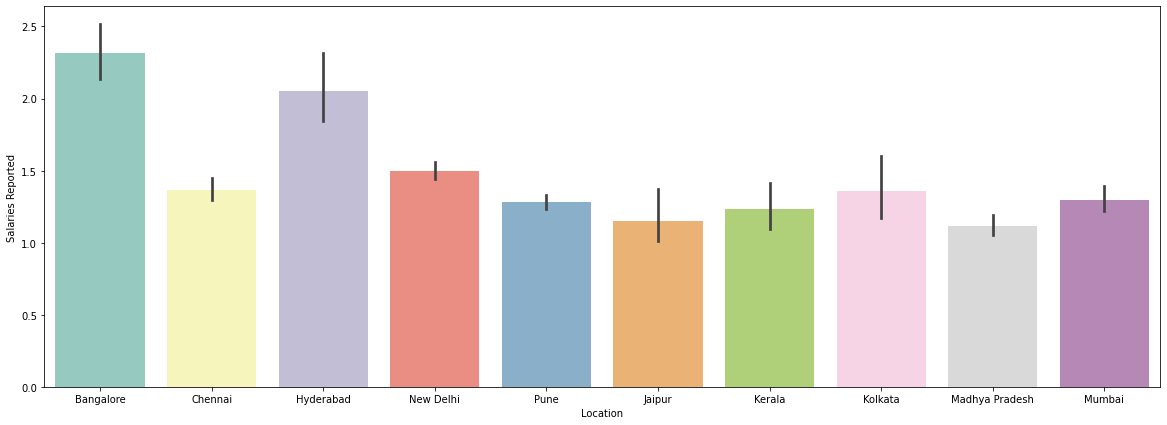

In [15]:
# Bar Plot for location vs salaries Reported

plt.figure(figsize=(20, 7))
sns.barplot (x = df["Location"], y = df["Salaries Reported"], palette="Set3")

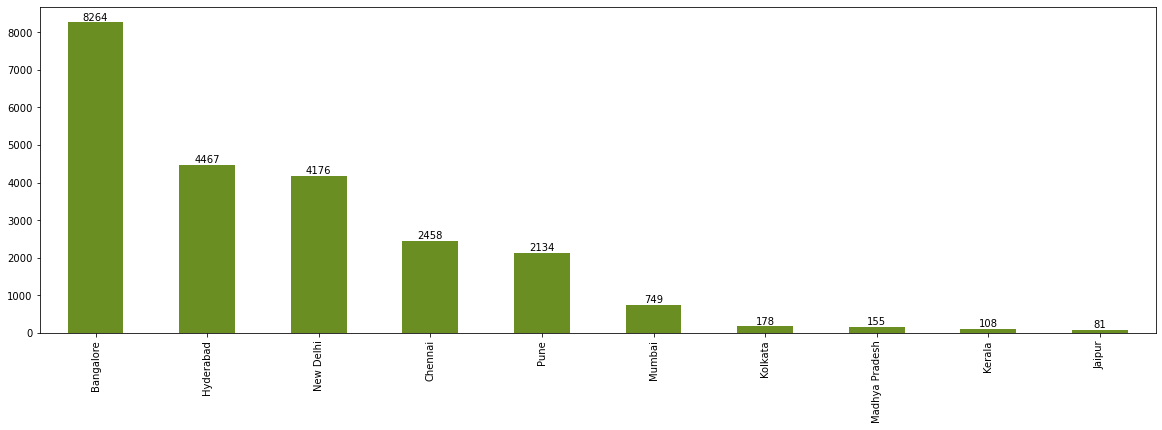

In [16]:
# Barplot for Number of location (count)

plt.figure(figsize=(20, 6))
ax = df.Location.value_counts().plot(kind = 'bar', color = 'olivedrab')

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')

<AxesSubplot:xlabel='Salary', ylabel='Location'>

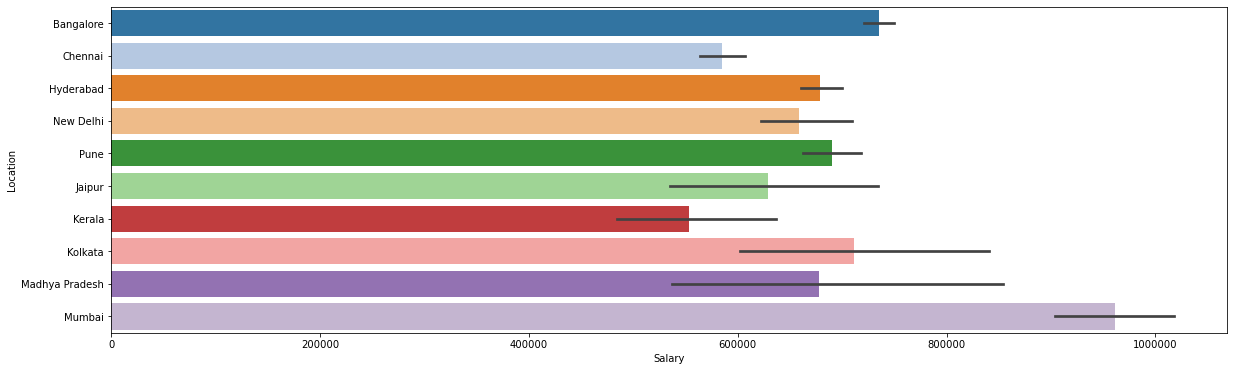

In [17]:
#bar plot for salary vs location

plt.figure(figsize=(20, 6))
plt.ticklabel_format(style= 'plain')
sns.barplot(x = df['Salary'], y = df['Location'], palette='tab20')

<AxesSubplot:xlabel='Company Name', ylabel='Salary'>

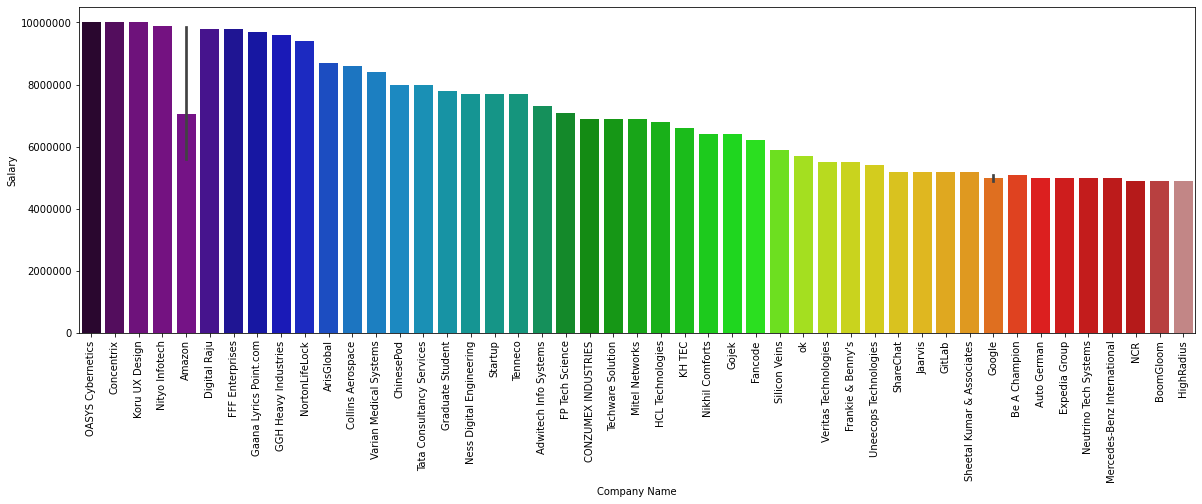

In [18]:
# Barplot company name vs Salary

plt.figure(figsize=(20, 6))
plt.xticks(rotation = 90)
plt.ticklabel_format(style= 'plain')
df.sort_values("Salary", axis= 0, ascending= False, inplace= True)
sns.barplot(x = df['Company Name'][1:51], y = df['Salary'][1:51], palette= 'nipy_spectral')

In [19]:
df["Job Title"].value_counts()

Software Development Engineer          2351
Android Developer                      2029
Software Development Engineer (SDE)    1614
Front End Developer                    1412
Test Engineer                          1314
                                       ... 
Engineer- Front End CAD                   1
Database Administrator Specialist         1
Ios Mobile Developer                      1
Front-End Chief Angular Architect         1
Ios App Developer - Intern                1
Name: Job Title, Length: 1080, dtype: int64

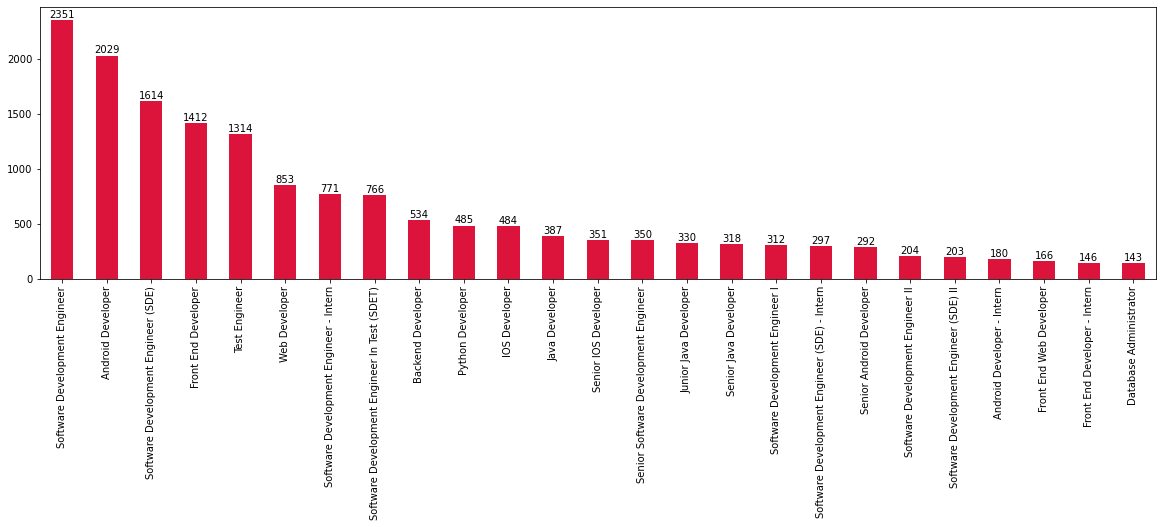

In [20]:
#Barplot for Number of different Job Titles (Count)

plt.figure(figsize = (20, 5))
ax = df["Job Title"].value_counts()[:25].plot(kind = 'bar', color = "crimson")

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')

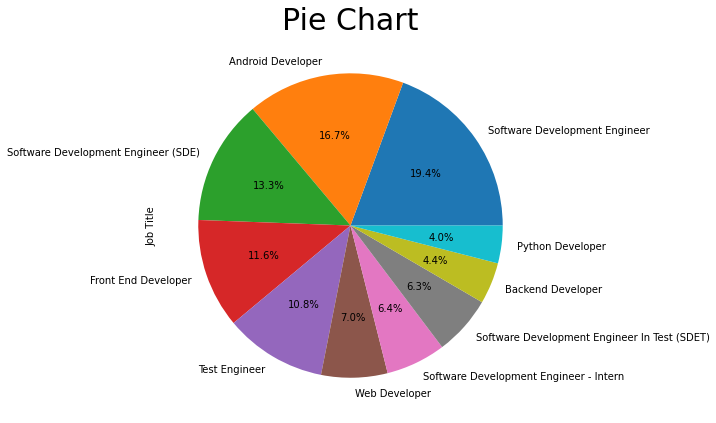

In [31]:
# Pie Chart Top for 20 Job Title (Precentage)

df['Job Title'].value_counts()[:10].plot.pie(figsize = (7, 7), autopct = '%1.1f%%')
plt.title("Pie Chart", fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

In [35]:
df['Company Name'].value_counts()

Tata Consultancy Services                         271
Amazon                                            184
Infosys                                           169
Accenture                                         150
Cognizant Technology Solutions                    144
                                                 ... 
Inovaantage                                         1
Polícia Militar do Estado de São Paulo (PMESP)      1
Alpha Business Solutions                            1
New York Life                                       1
Keeves Technologies                                 1
Name: Company Name, Length: 11261, dtype: int64

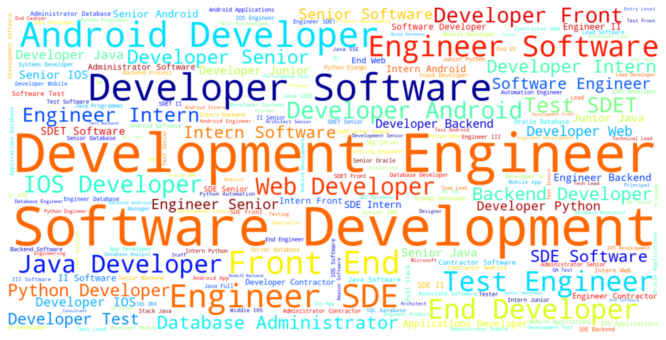

In [36]:
# WordCloud different Job Title

text = " ".join(Company for Company in df["Job Title"])

#font = "Quicksand-Bold.ttf"

word_cloud = WordCloud(width= 1600, height= 800, colormap= 'jet', background_color= 'white').generate(text)
plt.figure(figsize= (30, 6))
plt.imshow(word_cloud, interpolation= 'gaussian')
plt.axis("off")
plt.show()

<AxesSubplot:xlabel='Job Title', ylabel='Salary'>

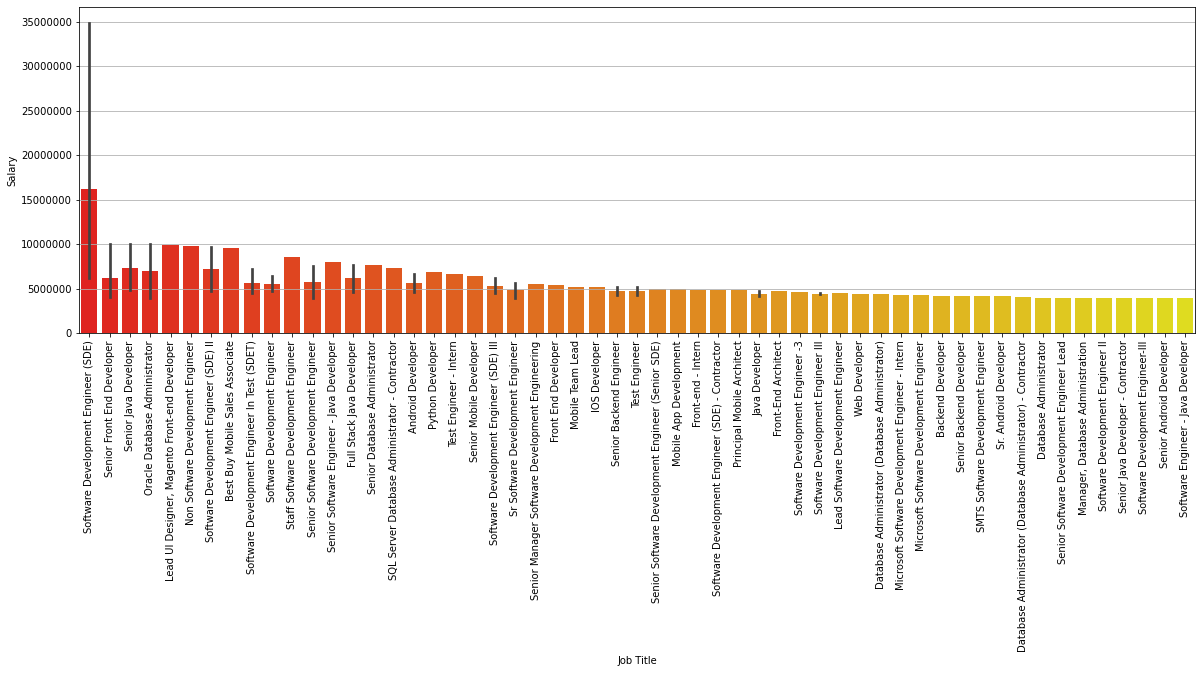

In [37]:
# Bar plot for job title vs top highest salaries

plt.figure(figsize= (20, 6))
plt.grid()
plt.xticks(rotation = 90)
plt.ticklabel_format(style= 'plain')
df.sort_values("Salary", axis= 0, ascending = False, inplace = True)
sns.barplot(x = df["Job Title"][:100], y =df["Salary"], palette= 'autumn')

<AxesSubplot:>

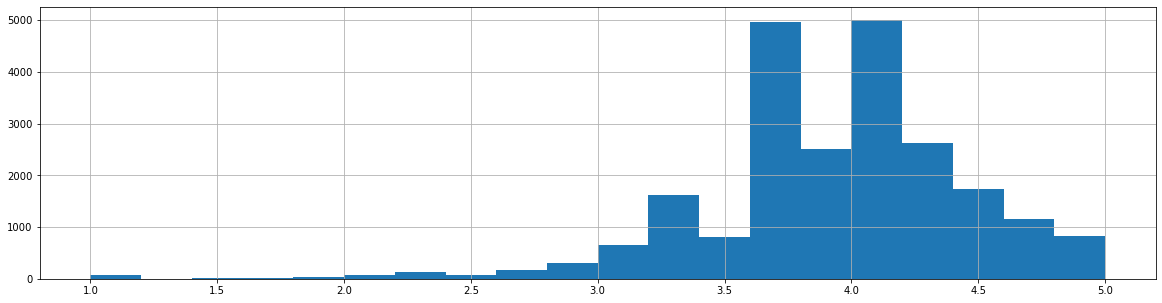

In [38]:
# Cheking histogram company rating

n_bins = 20
plt.figure(figsize= (20, 5))
df['Rating'].hist(bins = n_bins)

In [39]:
#Plotting Scatter Plot on Company Ratings vs Salaries Reported vs Location

fig = px.scatter(df, x ="Rating", y = "Salaries Reported", color = "Location")
fig.show()

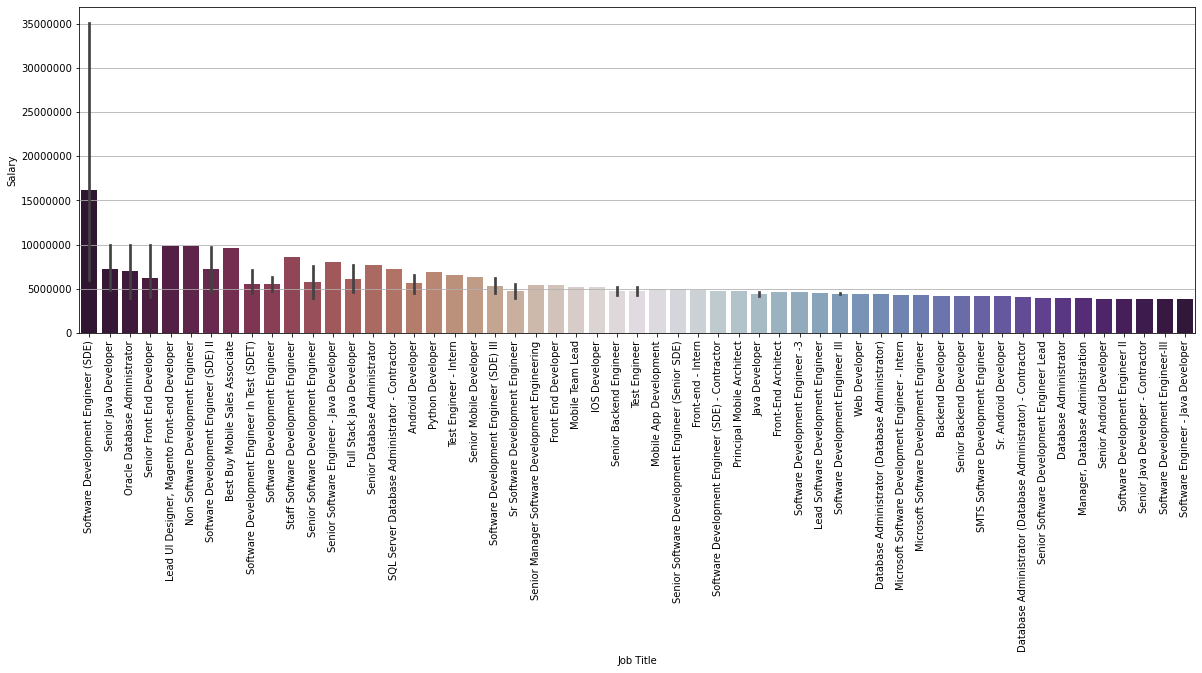

In [41]:
# Barplot for Job Title vs Top 100 Lowest Salaries

plt.figure(figsize= (20, 6))
plt.grid()
plt.xticks(rotation = 90)
plt.ticklabel_format(style= "plain")
df.sort_values('Salary', axis = 0, ascending= False, inplace= True)
sns.barplot(x = df['Job Title'][:100], y = df['Salary'], palette='twilight_shifted_r')
plt.show()

In [42]:
# Plotting Scatter Plot on Ratings vs Company Names

fig = px.scatter(df, x = "Rating", y = "Company Name", color = "Rating")
fig.show()

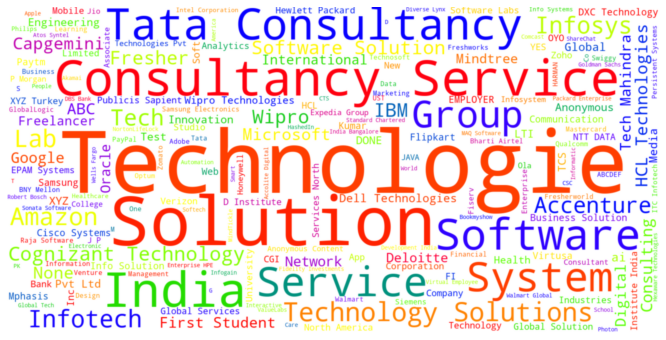

In [43]:
# WordCloud on different Company Names

text = " ".join(Company for Company in df["Company Name"])
#font = "Quicksand-Bold.ttf"
word_cloud = WordCloud(width = 1600, height = 800, colormap = 'prism', background_color = "white").generate(text)
plt.figure(figsize = (30, 6))
plt.imshow(word_cloud, interpolation="gaussian")
plt.axis("off")
plt.show()

In [44]:
# Loading the new dataset with extra features - Experimental

new_df = pd.read_csv("C:\\Users\\Silent Monster\\Documents\\Data Analyst Project\\Software Professional Salaries - Starter Notebook\\Software_Professional_Salaries.csv")
new_df.sample(5)

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
15251,4.1,ByteDance,Software Development Engineer (SDE),600000,1,Hyderabad,Full Time,SDE
2747,4.2,Codevian Technologies,Android Developer,372000,1,Pune,Full Time,Android
16669,3.9,ABCDEF,Software Development Engineer (SDE),1200000,1,Mumbai,Full Time,SDE
1455,3.8,Amazon,Android Software Engineer,624000,1,Hyderabad,Full Time,Android
13453,3.7,Global Edge Software,Senior Software Development Engineer,600000,2,Bangalore,Full Time,SDE


In [45]:
new_df['Job Roles'].value_counts()

SDE         8183
Android     2945
Frontend    2163
Java        1858
Testing     1740
IOS         1631
Backend     1194
Web          999
Python       947
Database     865
Mobile       245
Name: Job Roles, dtype: int64

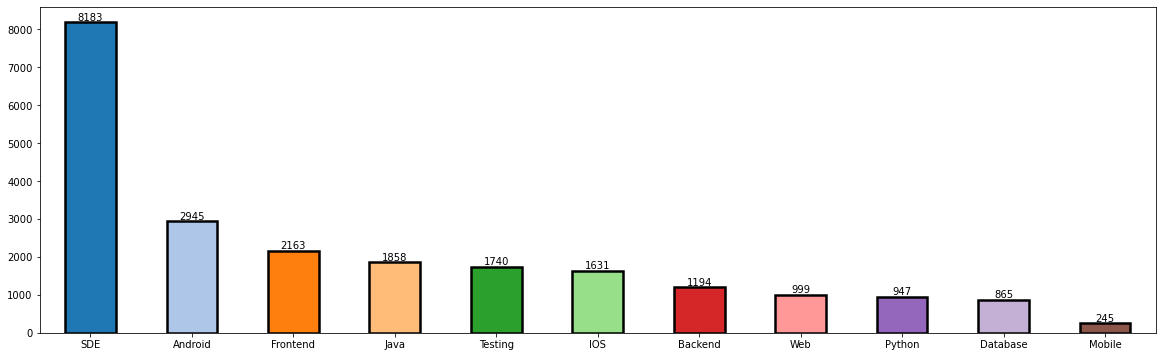

In [46]:
# Bar Plot for Job Roles

plt.figure(figsize = (20, 6))
col_map = plt.get_cmap('tab20')
ax = new_df["Job Roles"].value_counts().plot(kind = 'bar', color = col_map.colors, rot = 0, edgecolor = 'Black', linewidth = 2.5)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')

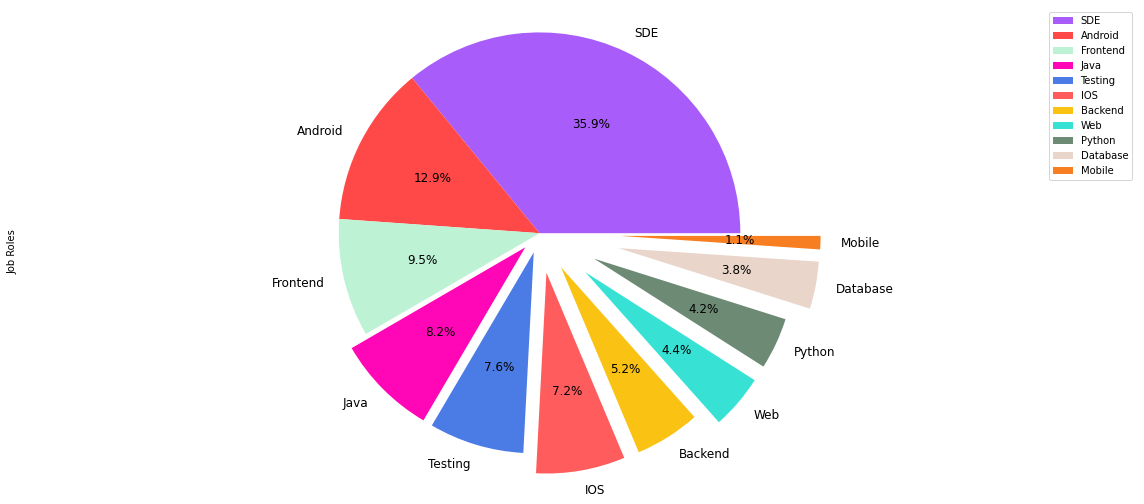

In [47]:
# Pie Chart on Job Roles

plt.figure(figsize = (20, 9))

counts = new_df["Job Roles"].value_counts()
explode = (0, 0, 0, 0.1, 0.1, 0.2, 0.2, 0.3, 0.3, 0.4, 0.4)
colors = ['#A85CF9', '#FF4949', '#BDF2D5', '#FF06B7', '#4B7BE5', '#FF5D5D', '#FAC213', '#37E2D5', '#6D8B74', '#E9D5CA', '#F77E21']

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()